<a href="https://colab.research.google.com/github/Biswa040/Cusomer_classification/blob/main/Customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(36)
n_customer = 500
age = np.random.randint(18,70,n_customer)
gender = np.random.randint(0,2,n_customer)
income = np.random.normal(50,15,n_customer).round(2)
purchase = np.random.poisson(3,n_customer)
churn = ((income < 40) & (purchase < 3)).astype(int)
df_cust = pd.DataFrame({
    'AGE': age,
    'GENDER':gender,
    'INCOME':income,
    'PURCHASE FREQUENCY':purchase,
    'CHURN':churn
})
df_cust.to_csv("customer.csv",index = False)
print("Customer database created and saved to 'customer.csv'")
print(df_cust.head())

Customer database created and saved to 'customer.csv'
   AGE  GENDER  INCOME  PURCHASE FREQUENCY  CHURN
0   23       1   55.29                   4      0
1   52       0   44.84                   8      0
2   48       0   64.36                   3      0
3   58       1   68.53                   3      0
4   51       0   46.19                   2      0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [7]:
df = pd.read_csv("customer.csv")
df.head()

,AGE,GENDER,INCOME,PURCHASE FREQUENCY,CHURN
0,23,1,55.29,4,0
1,52,0,44.84,8,0
2,48,0,64.36,3,0
3,58,1,68.53,3,0
4,51,0,46.19,2,0


In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 500 non-null    int64  
 1   GENDER              500 non-null    int64  
 2   INCOME              500 non-null    float64
 3   PURCHASE FREQUENCY  500 non-null    int64  
 4   CHURN               500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
AGE,0
GENDER,0
INCOME,0
PURCHASE FREQUENCY,0
CHURN,0


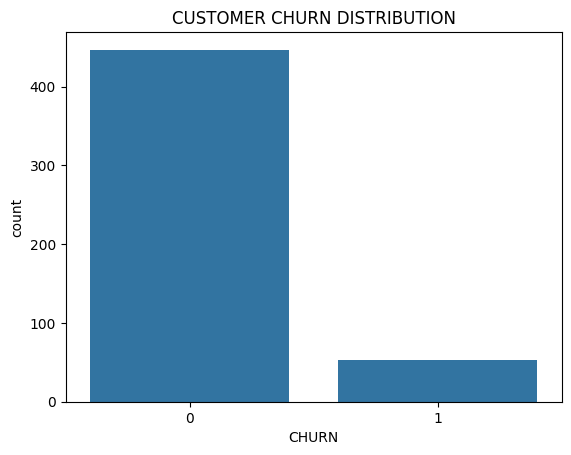

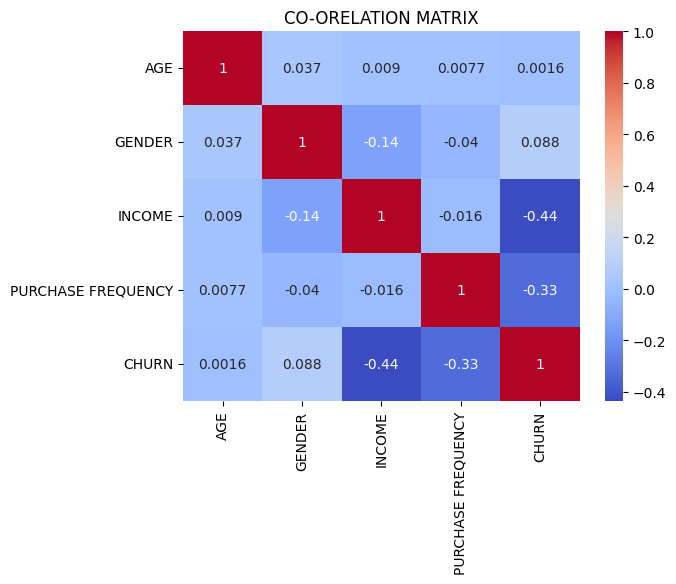

In [10]:
sns.countplot(x='CHURN',data=df)
plt.title("CUSTOMER CHURN DISTRIBUTION")
plt.show()
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("CO-ORELATION MATRIX")
plt.show()

In [14]:
X = df.drop("CHURN",axis = 1)
y = df["CHURN"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
print("ACCURACY SCORE:",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("CONFUSION MATRIX:\n",cm)
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred))

ACCURACY SCORE: 0.96
CONFUSION MATRIX:
 [[85  2]
 [ 2 11]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        87
           1       0.85      0.85      0.85        13

    accuracy                           0.96       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.96      0.96      0.96       100



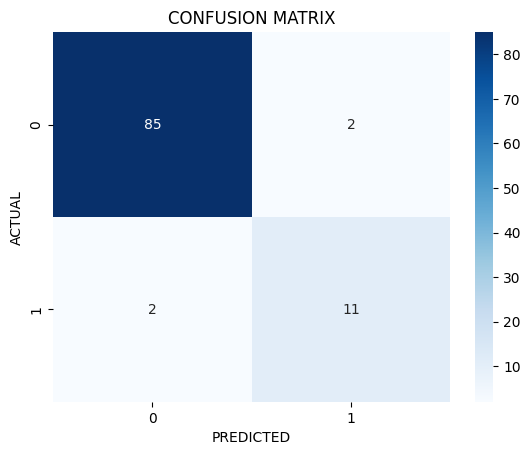

In [18]:
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title("CONFUSION MATRIX")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.show()

In [20]:
new_customer = pd.DataFrame({
    'AGE': [28],
    'GENDER':[1],
    'INCOME':[37],
    'PURCHASE FREQUENCY':[2],

})
prediction = model.predict(new_customer)[0]
if prediction == 1:
  print("This customer is likely to CHURN.Consider offering retention benifits.")
else:
  print("This customer is likely to STAY.Continue engagement as usual.")

This customer is likely to STAY.Continue engagement as usual.


In [21]:
age = 45
balance = 25000
transactions = 6
b0 = -4
b1 = 0.05
b2 = 0.0001
b3 = 0.3
z = b0 + (b1 * age) + (b2 * balance) + (b3 * transactions)
print("Linear score (z):", round(z, 4))
probability = 1 / (1 + np.exp(-z))
print("Predicted probability of churn:", round(probability, 4))
if probability > 0.5:
    print(" This customer is likely to CHURN.")
else:
    print(" This customer is likely to STAY.")

Linear score (z): 2.55
Predicted probability of churn: 0.9276
 This customer is likely to CHURN.
